In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocess
from sklearn.decomposition import PCA

import pprint

pp = pprint.PrettyPrinter(indent=4)

In [2]:
all_songs = pd.read_csv("data/all_songs1.csv")


In [3]:
all_songs.head()

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.325,0.578,-6.786,0.0455,0.158000,0.575,0.103,144.745
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.611,0.651,-6.973,0.0587,0.148000,0.105,0.357,122.983
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.542,0.758,-5.032,0.0313,0.000184,0.144,0.430,156.128
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.641,0.589,-6.305,0.0275,0.096000,0.208,0.110,100.001
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.862,0.400,-7.486,0.0736,0.005750,0.123,0.596,122.963


In [4]:
cluster_cols = all_songs.columns[3:]

In [5]:
cluster_cols

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [6]:
def scaleData(scaler, df, col_list = cluster_cols):
    
    """
    normalizes continuous values in dataframe
    
    inputs:  scaler:    one of the scaler functions from sklearn.preprocessing
             song_df:   dataframe of songs (with titles) 
             firstCol:  index of first column of continuous values to be rescaled in song_df 
    
    returns: dataframe of songs (with titles) with rescaled continuous values
    """
    
    scaled_df = df.copy()
        
    cluster_values = df.loc[:,col_list]
    mms = scaler()
    scaled_values = mms.fit_transform(cluster_values)
    
    for i in range(scaled_values.shape[1]):
        scaled_df[col_list[i]] = scaled_values[:,i]

    return scaled_df

In [7]:
scaled_df = scaleData(preprocess.MinMaxScaler, all_songs)
scaled_df.head()

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.116212,0.526316,0.666741,0.040709,0.163571,0.919463,0.074034,0.555515
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.526542,0.615667,0.656299,0.066420,0.153206,0.130872,0.348155,0.395986
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.427547,0.746634,0.764686,0.013050,0.000000,0.196309,0.426937,0.638959
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.569584,0.539780,0.693601,0.005649,0.099310,0.303691,0.081589,0.227513
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.886657,0.308446,0.627652,0.095442,0.005769,0.161074,0.606087,0.395839


In [8]:
def apply_pca(scaled_df, n, col_list = cluster_cols):
    """
    applies PCA to dataframe and attaches resulting PCA values as columns to end of dataframe
    
    inputs:  scaled_df:  dataframe of songs (with titles) with scaled continuous values
             n:          number of desired principal components
             firstCol:   index of first column of continuous values
             
    returns: scaled_df with principal component columns appended to end 
    """  
    
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(scaled_df.loc[:,col_list])
    pca_df = scaled_df.copy()
    for i in range(n):
        pca_df[f"pc{i+1}"] = principalComponents[:,i]
        
    return pca_df
    

In [9]:
pca_df = apply_pca(scaled_df, 2)
pca_df.head()

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,pc1,pc2
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.116212,0.526316,0.666741,0.040709,0.163571,0.919463,0.074034,0.555515,-0.165722,0.541033
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.526542,0.615667,0.656299,0.066420,0.153206,0.130872,0.348155,0.395986,-0.165114,0.068425
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.427547,0.746634,0.764686,0.013050,0.000000,0.196309,0.426937,0.638959,-0.447970,0.189226
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.569584,0.539780,0.693601,0.005649,0.099310,0.303691,0.081589,0.227513,-0.125609,0.129021
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.886657,0.308446,0.627652,0.095442,0.005769,0.161074,0.606087,0.395839,-0.092945,-0.245872


In [10]:
def plotKMeans(scaled_df, minCluster, maxCluster, col_list):
    """
    applies k-means clustering to dataframe and plots inertia and change in inertia for corresponding to number of clusters
    
    inputs:   df:          dataframe with only continuous values
              minCluster:  smallest number of desired clusters
              maxClusters: largest number of desired clusters
              col_list:    columns to cluster on
    
    returns:  list of intertias corresponding to number of clusters ranging from minCluster to maxCluster
    
    """

    df = scaled_df.loc[:,col_list]
    
    
    inertias = []
    for i in range(minCluster, maxCluster+1):
        kmeans = KMeans(n_clusters = i).fit(df)
        inertias.append(kmeans.inertia_)    
    
    plt.plot(range(1,len(inertias)+1), inertias, "bx-")
    plt.xlabel('k')
    plt.ylabel("Inertia")
    plt.xticks(range(1,len(inertias)+1))
    plt.show()
    
    
    diffs = np.array(inertias[1:]) - np.array(inertias[:len(inertias)-1])
    plt.plot(range(1,len(inertias)+1), [-inertias[0]] + list(diffs),"bx-")
    plt.ylabel("Change in Inertia")
    plt.xticks(range(1,len(inertias)+1))

    plt.show()
    
    return inertias
    

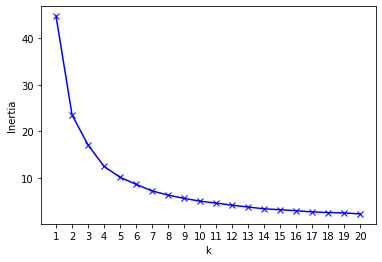

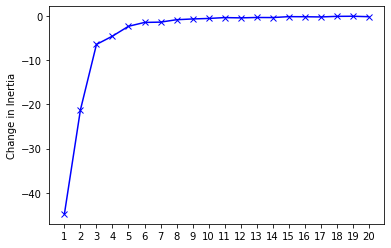

In [11]:
inertias = plotKMeans(pca_df, 1, 20, ["pc1","pc2"])

In [12]:
k = 7

In [13]:
def fitKMeans(scaled_df, k, col_list):
    """
    applies k-means clustering with k clusters to dataframe
    
    inputs:   song_df:      dataframe of songs (with titles)
              clusters:  number of desired clusters
              col_list: list of column indexes to cluster on
            
    returns:  dataframe of songs with cluster number
              dict of dataframes {cluster number: subset of song_df with songs belonging to cluster}
              dict of Counters   {cluster number: Counter(artist, number of times artist appears in cluster)}
    """
    
    kmeans_opt = KMeans(n_clusters = k).fit(scaled_df.loc[:,col_list])
    labels_df = scaled_df.copy()
    labels_df["label"] = kmeans_opt.labels_
#     labels_df = labels_df.sort_values(by = "label").reset_index(drop = True)

    
    return labels_df

In [14]:
cluster_df = fitKMeans(pca_df, k, ['pc1', 'pc2'])
cluster_df.head()

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,pc1,pc2,label
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.116212,0.526316,0.666741,0.040709,0.163571,0.919463,0.074034,0.555515,-0.165722,0.541033,3
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.526542,0.615667,0.656299,0.066420,0.153206,0.130872,0.348155,0.395986,-0.165114,0.068425,4
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.427547,0.746634,0.764686,0.013050,0.000000,0.196309,0.426937,0.638959,-0.447970,0.189226,3
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.569584,0.539780,0.693601,0.005649,0.099310,0.303691,0.081589,0.227513,-0.125609,0.129021,4
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.886657,0.308446,0.627652,0.095442,0.005769,0.161074,0.606087,0.395839,-0.092945,-0.245872,2


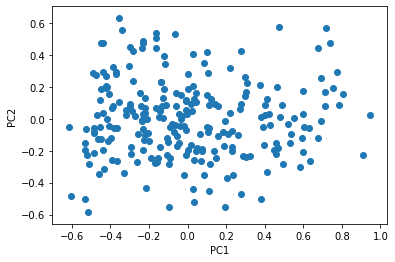

In [15]:
plt.scatter(cluster_df["pc1"], cluster_df["pc2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

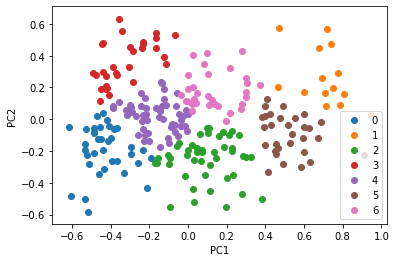

In [16]:
for i in range(k):
    sub = cluster_df.loc[cluster_df.label == i]
    plt.scatter(sub["pc1"], sub["pc2"], label = i)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [17]:
cluster_df

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,pc1,pc2,label
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.116212,0.526316,0.666741,0.040709,0.163571,0.919463,0.074034,0.555515,-0.165722,0.541033,3
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.526542,0.615667,0.656299,0.066420,0.153206,0.130872,0.348155,0.395986,-0.165114,0.068425,4
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.427547,0.746634,0.764686,0.013050,0.000000,0.196309,0.426937,0.638959,-0.447970,0.189226,3
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.569584,0.539780,0.693601,0.005649,0.099310,0.303691,0.081589,0.227513,-0.125609,0.129021,4
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.886657,0.308446,0.627652,0.095442,0.005769,0.161074,0.606087,0.395839,-0.092945,-0.245872,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,spotify:track:7uzmGiiJyRfuViKKK3lVmR,Bazzi,Mine,0.668580,0.784578,0.829350,0.092715,0.016496,0.711409,0.736672,0.542202,-0.486988,-0.214972,0
235,spotify:track:2cvOfKHOHgwQlLiuLKP2xR,Post Malone,Myself,0.332855,0.676867,0.809247,0.020062,0.105529,0.360738,0.399957,0.695801,-0.368952,0.279627,3
236,spotify:track:1YuIEfhp8umr6QSal4FTK4,John K,OT,0.703013,0.361077,0.684610,0.105571,0.449636,0.134228,0.628750,0.077118,0.202622,-0.368152,2
237,spotify:track:27as7exfxU3cNaYKr3HlHI,Lauv,Mean It - stripped,0.421808,0.097919,0.440529,0.017141,0.773014,0.166107,0.520829,0.160885,0.627108,-0.055810,5


In [18]:
cluster_df.loc[:,cluster_cols] = all_songs.loc[:,cluster_cols].values

In [19]:
cluster_df

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,pc1,pc2,label
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.325,0.578,-6.786,0.0455,0.158000,0.575,0.103,144.745,-0.165722,0.541033,3
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.611,0.651,-6.973,0.0587,0.148000,0.105,0.357,122.983,-0.165114,0.068425,4
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.542,0.758,-5.032,0.0313,0.000184,0.144,0.430,156.128,-0.447970,0.189226,3
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.641,0.589,-6.305,0.0275,0.096000,0.208,0.110,100.001,-0.125609,0.129021,4
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.862,0.400,-7.486,0.0736,0.005750,0.123,0.596,122.963,-0.092945,-0.245872,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,spotify:track:7uzmGiiJyRfuViKKK3lVmR,Bazzi,Mine,0.710,0.789,-3.874,0.0722,0.016100,0.451,0.717,142.929,-0.486988,-0.214972,0
235,spotify:track:2cvOfKHOHgwQlLiuLKP2xR,Post Malone,Myself,0.476,0.701,-4.234,0.0349,0.102000,0.242,0.405,163.882,-0.368952,0.279627,3
236,spotify:track:1YuIEfhp8umr6QSal4FTK4,John K,OT,0.734,0.443,-6.466,0.0788,0.434000,0.107,0.617,79.485,0.202622,-0.368152,2
237,spotify:track:27as7exfxU3cNaYKr3HlHI,Lauv,Mean It - stripped,0.538,0.228,-10.837,0.0334,0.746000,0.126,0.517,90.912,0.627108,-0.055810,5


In [20]:
cluster_df.to_csv(f"data/all_songs_clustered.csv", index = False)